In [8]:
import qiskit.quantum_info as qi 
from qiskit.circuit.library import FourierChecking
from qiskit.visualization import plot_histogram

FOURIER CHECKING

In [2]:
f= [1,-1,-1,-1]
g=[1,1,-1,-1]

In [3]:
circ= FourierChecking(f=f,g=g)
circ.draw()

┌───┐┌───────────────────────┐┌───┐┌──────────────────────┐┌───┐
q_0: ┤ H ├┤0                      ├┤ H ├┤0                     ├┤ H ├
     ├───┤│  DIAGONAL(1,-1,-1,-1) │├───┤│  DIAGONAL(1,1,-1,-1) │├───┤
q_1: ┤ H ├┤1                      ├┤ H ├┤1                     ├┤ H ├
     └───┘└───────────────────────┘└───┘└──────────────────────┘└───┘

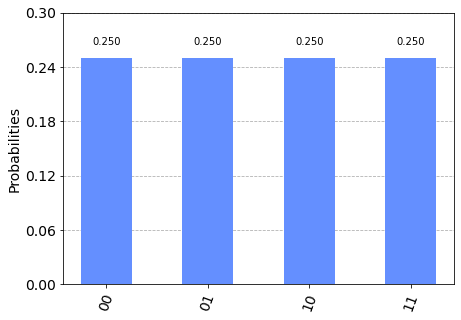

In [4]:
zero= qi.Statevector.from_label("00")
sv= zero.evolve(circ)
probs= sv.probabilities_dict()
plot_histogram(probs)

GROVERS ALGORITHM 

In [12]:
my_list= [1,3,5,2,4,9,5,8,0,7,6]

In [13]:
def the_oracle(my_input):
    winner= 7 
    if my_input is winner:
        response= True
    else:
        response= False
    return response

In [16]:
for index, trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print("Winner Found at index ", index )

Winner Found at index  9


Problem scales at o(N) in classical computer vs o(sqr(N)) in quantum computer

In [7]:
from qiskit import *
import matplotlib.pyplot as plt 
import numpy as np 

In [18]:
oracle= QuantumCircuit(2,name= "oracle") #two quibits
oracle.cz(0,1) #apply cz gate to flip sign
oracle.to_gate() #oracle own gate
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [19]:
backend= Aer.get_backend("statevector_simulator")
grover_circ= QuantumCircuit(2,2) #two qubits, two classical registers
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [20]:
job = execute(grover_circ, backend)
result= job.result()
sv= result.get_statevector()
np.around(sv,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [24]:
reflection= QuantumCircuit(2, name= "reflection")
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [26]:
backend= Aer.get_backend("qasm_simulator")
grover_circ= QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])
grover_circ.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [27]:
job= execute(grover_circ, backend, shots= 1)
result= job.result()
result.get_counts()

{'11': 1}

QUANTUM MACHINE LEARNING

In [6]:
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name


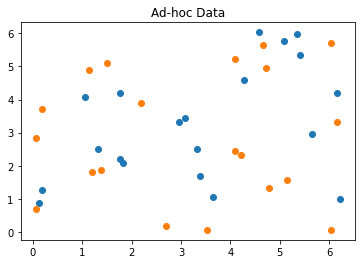

{'A': 0, 'B': 1}


In [31]:
feature_dim= 2 
training_dataset_size= 20
testing_dataset_size= 10
random_seed= 10598
shot= 10000

sample_Total, training_input, test_input, class_labels= ad_hoc_data(training_size=training_dataset_size, test_size= testing_dataset_size, gap= 0.3, n= feature_dim, plot_data= True)
#gap in higher dimensional space that will separate ad_hoc data

datapoints, class_to_label= split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [33]:
backend= BasicAer.get_backend("qasm_simulator")
feature_map= ZZFeatureMap(feature_dim, reps= 2)
svm=QSVM(feature_map, training_input, test_input, None)
svm.random_seed=random_seed
quantum_instance= QuantumInstance(backend, shots= shot,seed_simulator=random_seed, seed_transpiler=random_seed)
result= svm.run(quantum_instance)

MissingOptionalLibraryError: "The 'CVXPY' library is required to use 'optimize_svm'. You can install it with 'pip install qiskit-aqua[cvx]'."

In [ ]:
print("kernel matrix during the training")
kernel_matrix= result("kernel_matrix")

PLAYING WITH GATES (SUPERPOSITION)

In [11]:
import numpy as np 
from qiskit.quantum_info import Statevector

In [42]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/np.sqrt(2), -1/np.sqrt(2)]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
q_0: ┤ initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

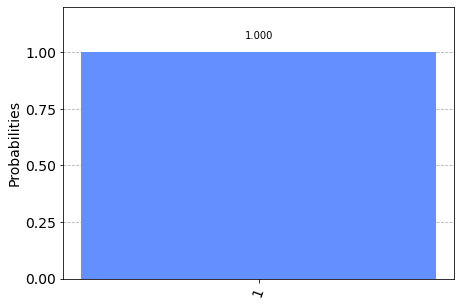

In [43]:
qasmsim = Aer.get_backend('qasm_simulator')  # Tell Qiskit how to simulate our circuit
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = qasmsim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output state vector

In [44]:
qc2= QuantumCircuit(1,1)
qc2.initialize(initial_state,0)

qc2.measure(0,0)
qc2.draw()
qc2.draw()

┌──────────────────────────────┐┌─┐
q_0: ┤ initialize(0.70711,-0.70711) ├┤M├
     └──────────────────────────────┘└╥┘
c: 1/═════════════════════════════════╩═
                                      0

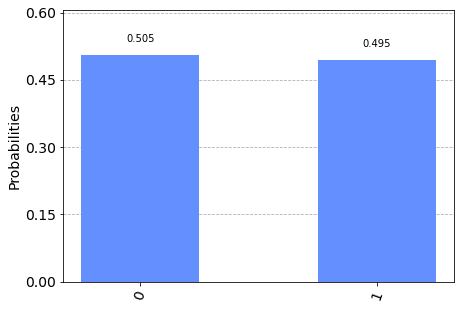

In [45]:
qasmsim = Aer.get_backend('qasm_simulator')  # Tell Qiskit how to simulate our circuit
qobj = assemble(qc2)  # Assemble circuit into a Qobj that can be run
counts = qasmsim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output state vector

In [38]:
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [47]:
# Create the X-measurement function:
def y_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/np.sqrt(2), -1/np.sqrt(2)]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
q_0: ┤ initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

THE RPHI GATE (ROTATION ABOUT Z AXIS)

In [48]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+rz')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [52]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram

┌───┐           
q_0: ┤ H ├─────■─────
     ├───┤┌────┴────┐
q_1: ┤ X ├┤ P(-π/2) ├
     └───┘└─────────┘

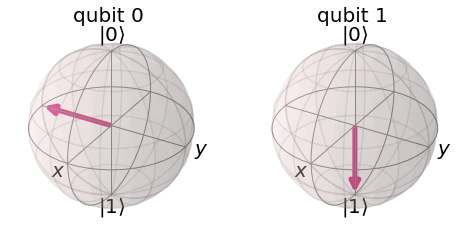

In [57]:
svsim = Aer.get_backend('statevector_simulator')

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(-np.pi/2, 0, 1)
display(qc.draw())
# See Results:
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

In [63]:
final_state

array([0.00000000e+00+0.j        , 0.00000000e+00+0.j        ,
       7.07106781e-01+0.j        , 4.32978028e-17-0.70710678j])

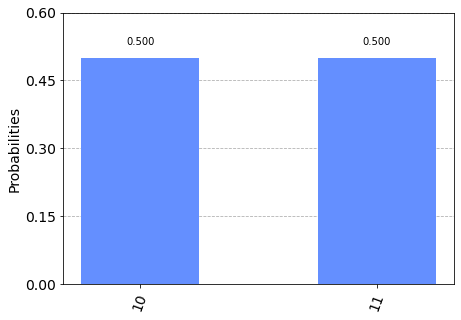

In [62]:
zero= qi.Statevector.from_label("00")
sv= zero.evolve(qc)
p = sv.probabilities_dict()
plot_histogram(p)

{'10': 0.4999999999999999, '11': 0.4999999999999999}

In [66]:
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(1)
qc.cx(0,1)
qc.s(1)
qc.draw()

q_0: ─────────■───────
     ┌─────┐┌─┴─┐┌───┐
q_1: ┤ SDG ├┤ X ├┤ S ├
     └─────┘└───┘└───┘

In [73]:
from qiskit.visualization import plot_state_qsphere


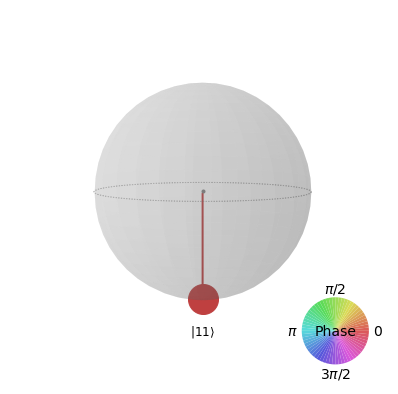

In [76]:
zero= qi.Statevector.from_label("01")
sv_new=zero.evolve(qc)
plot_state_qsphere(sv_new.data)

In [77]:
from qiskit import QuantumCircuit, QuantumRegister

In [78]:
input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')

Uf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Uf.cx(input_bit[0], output_bit[0])

Uf.draw()

input_0: ──■──
           ┌─┴─┐
 output_0: ┤ X ├
           └───┘
garbage_0: ─────

In [79]:
Vf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw()

input_0: ──■────■──
             │  ┌─┴─┐
 output_0: ──┼──┤ X ├
           ┌─┴─┐└───┘
garbage_0: ┤ X ├─────
           └───┘

In [80]:
qc = Uf + Vf.inverse()
qc.draw()

input_0: ──■────■────■──
           ┌─┴─┐┌─┴─┐  │  
 output_0: ┤ X ├┤ X ├──┼──
           └───┘└───┘┌─┴─┐
garbage_0: ──────────┤ X ├
                     └───┘

In [100]:
final_output_bit = QuantumRegister(1, 'final-output')

copy = QuantumCircuit(output_bit, final_output_bit)
copy.cx(output_bit, final_output_bit)

copy.draw()

output_0: ──■──
                ┌─┴─┐
final-output_0: ┤ X ├
                └───┘

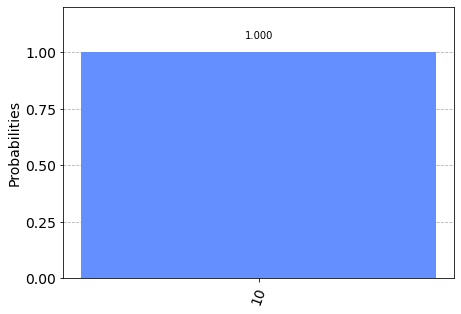

In [107]:
sv= Statevector.from_label("10")

sv_new= sv.evolve(copy)
sv_new.data

p = sv_new.probabilities_dict()
plot_histogram(p)


In [113]:
QC=(Vf.inverse() + copy + Vf)
QC.draw()

input_0: ──■────■─────────■────■──
                ┌─┴─┐  │         │  ┌─┴─┐
      output_0: ┤ X ├──┼────■────┼──┤ X ├
                └───┘┌─┴─┐  │  ┌─┴─┐└───┘
     garbage_0: ─────┤ X ├──┼──┤ X ├─────
                     └───┘┌─┴─┐└───┘     
final-output_0: ──────────┤ X ├──────────
                          └───┘

In [116]:
sv= Statevector.from_label("0001")

sv_new= sv.evolve(QC)
sv_new.data

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

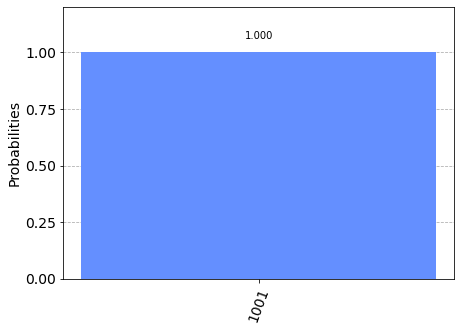

In [117]:
p = sv_new.probabilities_dict()
plot_histogram(p)

DEUTSCH-JOTZA ALGORITHM 

In [118]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [119]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

In [120]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

In [122]:
qasm_sim = Aer.get_backend('qasm_simulator')

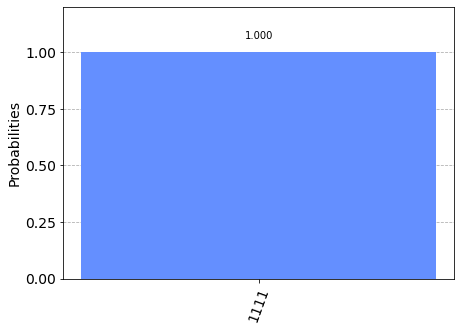

In [123]:
qasm_sim = Aer.get_backend('qasm_simulator')

transpiled_dj_circuit = transpile(dj_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

In [125]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [126]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

Bernstein-Vazirani Algorithm 
